In [14]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

#matplotlib.rcParams["text.usetex"] = True
#matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "11"

textwidth_points = 455.2441
textwidth_inch = textwidth_points/72.27

## Functions that return k-spaces

In [2]:
def k_even(L):
    return [(2*n-1)*np.pi/L for n in range(1,int(L/2)+1)]

def k_odd(L):
    return [(2*n)*np.pi/L for n in range(1,int(L/2))]

def Energy_k(k,J,h,g,X):
    return 2*np.sqrt(J**2 * np.sin(k)**2 + (h-2*g*X-J*np.cos(k))**2)

def E0_sum(k_vec,J,h,g,X):
    return sum( Energy_k(k,J,h,g,X) for k in k_vec )

## The classical potentials

In [4]:
def V_spring(w,J,Y,g,X,L):
    kspace = k_even(L)
    sum=0
    for k in kspace:
        E_k = np.sqrt( np.sin(k)**2 + (Y-np.sqrt(2)*g*X/J-np.cos(k))**2 )
        sum = sum + 2*J*E_k
    return w/2*X**2 - sum

def V_spring2(w,J,Y,g,X,L):
    kspace = k_even(L)
    sum=0
    for k in kspace:
        E_k = np.sqrt( J**2*np.sin(k)**2 + (h-np.sqrt(2)*g*X-J*np.cos(k))**2 )
        sum = sum + 2*E_k
    return w/2*X**2 - sum

Y = h/J =  17.0


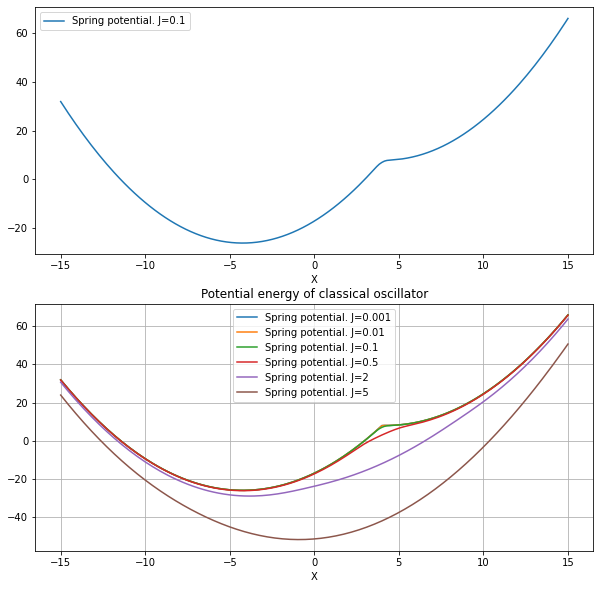

In [103]:
X_space = np.linspace(-15,15,200)

J=0.1
g=0.3
h=1.7
Y=h/J
print("Y = h/J = ",Y)
L=10
w=1

fig , axs = plt.subplots(2,figsize=(10,10))
axs[0].plot(X_space,V_spring(w,J,Y,g,X_space,L),label="Spring potential. J="+str(J))
axs[0].set_xlabel("X")
axs[0].legend(loc="best")

Jvec = [0.001,0.01,0.1,0.5,2,5]

for j in Jvec:
    axs[1].plot(X_space,V_spring(w,j,h/j,g,X_space,L),label="Spring potential. J="+str(j))
axs[1].set_title("Potential energy of classical oscillator")
axs[1].set_xlabel("X")
axs[1].legend(loc="best")
axs[1].grid("True")

plt.savefig('Potential_energy_plot_strong_U.png')

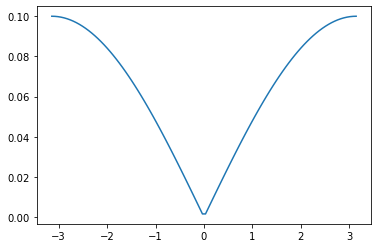

In [104]:
k_space = np.pi*np.linspace(-1,1,100)

def quasi_energy(k,U,t,l,X):
    g = 2*t/U-4*l/U*X
    return U/2*np.sqrt(np.sin(k)**2+(np.cos(k)-g)**2)

fig , ax = plt.subplots()
ax.plot(k_space,quasi_energy(k_space,0.1,0.9,0.3,1.416666))


In [105]:
def magnet_zero(L,U,l,t,X):
    m = 0
    g = 2*t/U-4*l*X/U
    m = 0
    k_vec = []
    for i in range(1,L+1):
        k = 2*np.pi/L*(i-0.5-L/2)
        k_vec.append(k/np.pi)
        m_k = np.abs(np.cos(k)-g)/np.sqrt(np.sin(k)**2+(np.cos(k)-g)**2)
        m = m + m_k
    print('k space / $\pi$: ',k_vec)
    return 1/(2*L)*m

k space / $\pi$:  [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
k space / $\pi$:  [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
k space / $\pi$:  [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
k space / $\pi$:  [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]


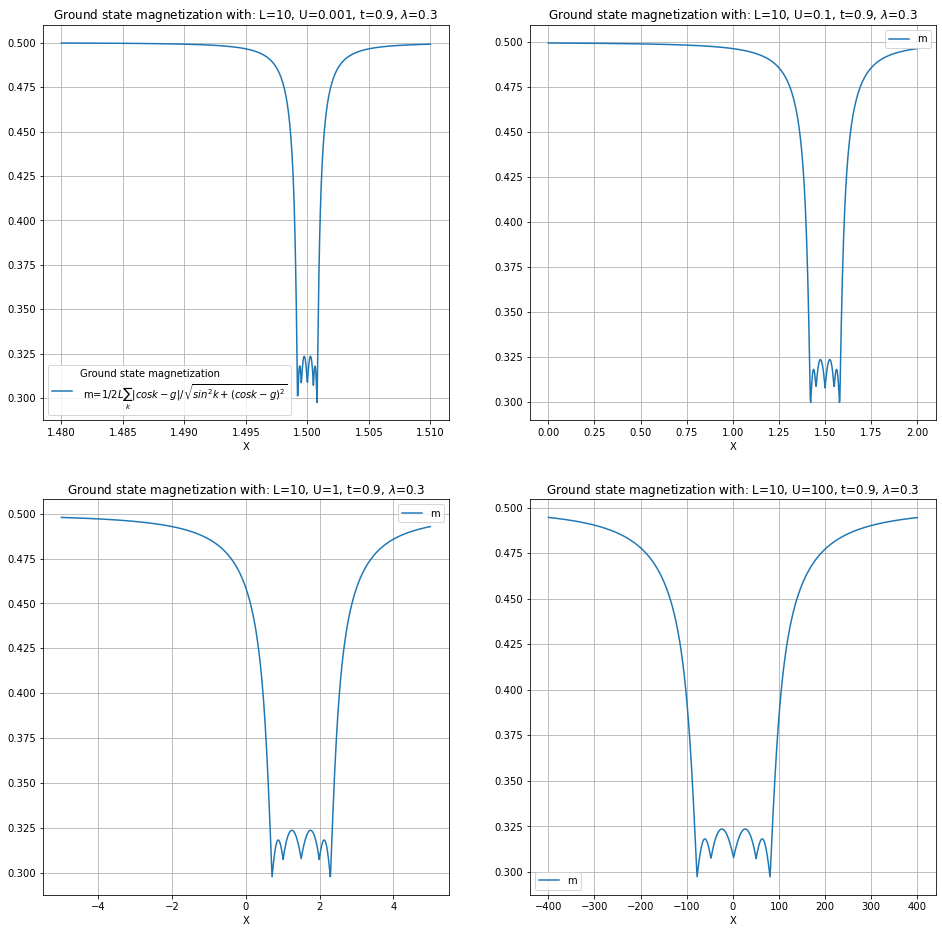

In [106]:
X_space0 = np.linspace(1.48,1.51,1001)
X_space05 = np.linspace(0,2,1001)
X_space1 = np.linspace(-5,5,1001)
X_space2 = np.linspace(-400,400,1001)

U=0.1
l=0.3
t=0.9
L=10
omega=1

figm , axsm = plt.subplots(2,2,figsize=(16,16))
axsm[0,0].plot(X_space0,magnet_zero(L,0.001,l,t,X_space0),label="Ground state magnetization \n m=$1/2L \sum_k {|cosk - g|}/{\sqrt{sin^2k+(cosk-g)^2}}$")
axsm[0,0].set_title("Ground state magnetization with: L="+str(L)+", U="+str(0.001)+", t="+str(t)+", $\lambda$="+str(l))
axsm[0,0].set_xlabel("X")
axsm[0,0].legend(loc="best")
axsm[0,0].grid("True")

axsm[0,1].plot(X_space05,magnet_zero(L,0.1,l,t,X_space05),label="m")
axsm[0,1].set_title("Ground state magnetization with: L="+str(L)+", U="+str(0.1)+", t="+str(t)+", $\lambda$="+str(l))
axsm[0,1].set_xlabel("X")
axsm[0,1].legend(loc="best")
axsm[0,1].grid("True")

axsm[1,0].plot(X_space1,magnet_zero(L,1,l,t,X_space1),label="m")
axsm[1,0].set_title("Ground state magnetization with: L="+str(L)+", U="+str(1)+", t="+str(t)+", $\lambda$="+str(l))
axsm[1,0].set_xlabel("X")
axsm[1,0].legend(loc="best")
axsm[1,0].grid("True")

axsm[1,1].plot(X_space2,magnet_zero(L,100,l,t,X_space2),label="m")
axsm[1,1].set_title("Ground state magnetization with: L="+str(L)+", U="+str(100)+", t="+str(t)+", $\lambda$="+str(l))
axsm[1,1].set_xlabel("X")
axsm[1,1].legend(loc="best")
axsm[1,1].grid("True")

plt.savefig('magnetization4.png')



In [107]:
def magnet_ex(L,U,l,t,X):
    m = 0
    g = 2*t/U-4*l*X/U
    m = 0
    N = np.linspace(1,10,10)
    K = 2*np.pi/L*(N-0.5-L/2) 
    Kpos = K[int(L/2):]
    print("Kpos/pi: ",Kpos/np.pi)

    M = []
    #m0 = 0
    #for k in Kpos:
    #    m0 = m0 + 1/(1*L)*np.abs(np.cos(k)-g)/np.sqrt(np.sin(k)**2+(np.cos(k)-g)**2)
    #print("m0 = ",m0)
    #M.append(m0)
    
    x = range(0,np.size(Kpos)+1)

    for i in x:
        mex = 0
        Knone = Kpos[i:]
        Kex = Kpos[:i]
        for k in Knone:
            mex = mex + 1/L*np.abs(np.cos(k)-g)/np.sqrt(np.sin(k)**2+(np.cos(k)-g)**2)
        for k in Kex:
            mex = mex - 1/L*np.abs(np.cos(k)-g)/np.sqrt(np.sin(k)**2+(np.cos(k)-g)**2)
        M.append(mex)
    return M



Kpos/pi:  [0.1 0.3 0.5 0.7 0.9]
[0.30776835371752576, 0.11755705045849504, 8.534839501805891e-16, 1.4351333329309988e-16, -0.11755705045849493, -0.30776835371752576]
Kpos/pi:  [0.1 0.3 0.5 0.7 0.9]
Kpos/pi:  [0.1 0.3 0.5 0.7 0.9]


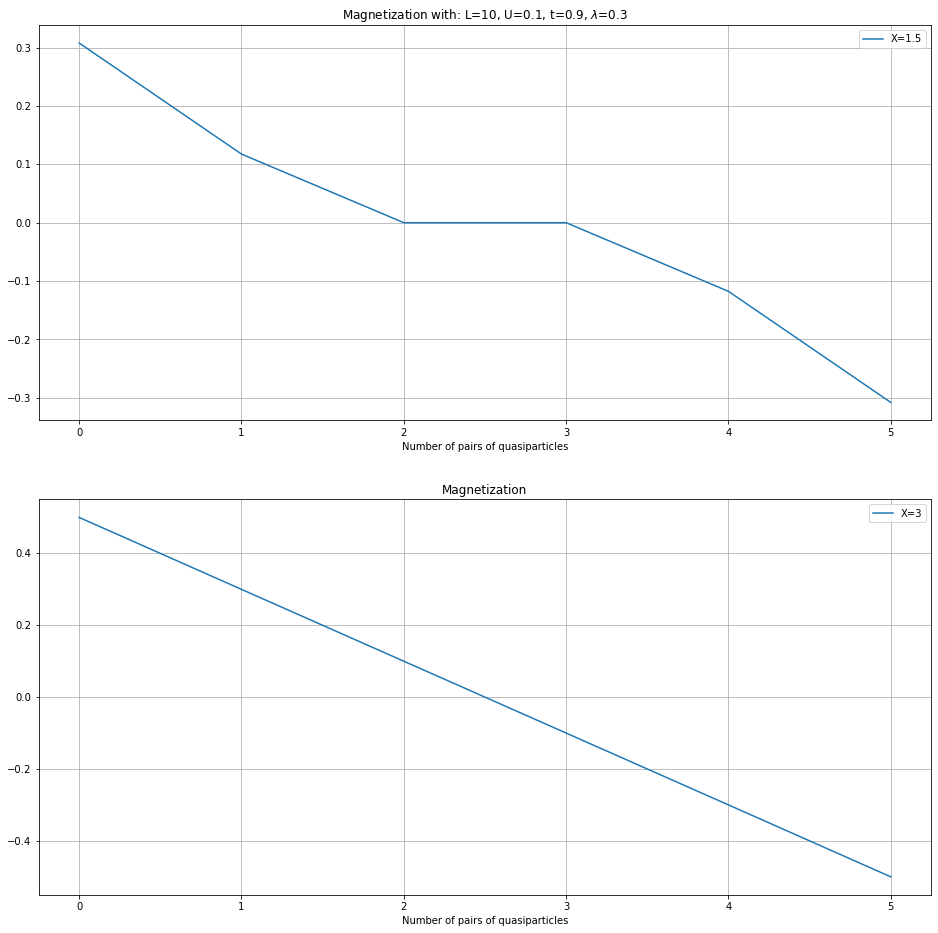

In [108]:
Mtest = magnet_ex(10,0.1,0.3,0.9,1.5)
x = np.linspace(0,5,6)

print(Mtest)

figm , axsm = plt.subplots(2,figsize=(16,16))
axsm[0].plot(x,magnet_ex(10,0.1,0.3,0.9,1.5),label="X=1.5")
axsm[0].set_title("Magnetization with: L="+str(L)+", U="+str(U)+", t="+str(t)+", $\lambda$="+str(l))
axsm[0].set_xlabel("Number of pairs of quasiparticles")
axsm[0].legend(loc="best")
axsm[0].grid("True")

axsm[1].plot(x,magnet_ex(10,0.1,0.3,0.9,3),label="X=3")
axsm[1].set_title("Magnetization")
axsm[1].set_xlabel("Number of pairs of quasiparticles")
axsm[1].legend(loc="best")
axsm[1].grid("True")



In [109]:
test = [1,2,3,4,5]
print(test[1:])
print(test[:1])

[2, 3, 4, 5]
[1]


findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font family 'roman' not found.
findfont: Font f

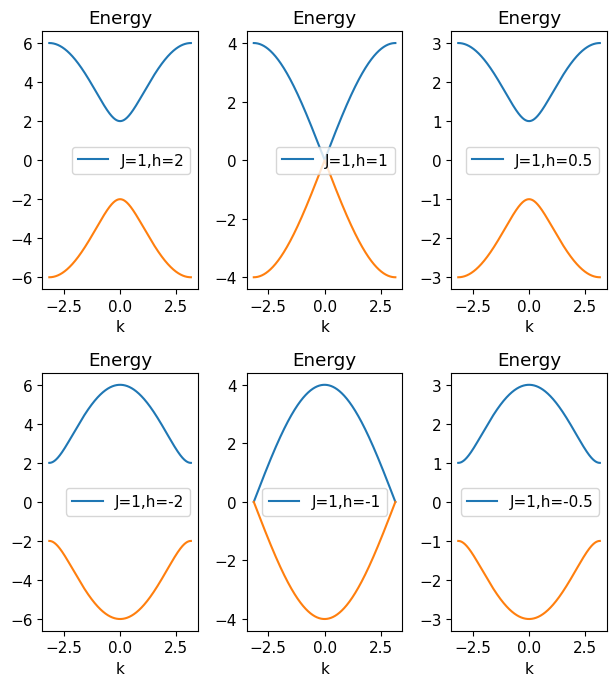

In [15]:
#Simple plot of energies

def EnergyK(J,h,k):
    return 2*np.sqrt(J**2 * np.sin(k)**2 + (h-J*np.cos(k))**2 )

full_k_space = np.linspace(-np.pi , np.pi,1000)
shifted_k_space = np.linspace(0 , 2*np.pi,1000)

#plt.plot(full_k_space,EnergyK(1,-2,full_k_space))

fig , axs = plt.subplots(2,3,figsize=(textwidth_inch,7))
axs[0,0].plot(full_k_space,EnergyK(1,2,full_k_space),label="J=1,h=2")
axs[0,0].plot(full_k_space,-EnergyK(1,2,full_k_space))
axs[0,0].set_title("Energy")
axs[0,0].set_xlabel("k")
axs[0,0].legend(loc="best")

axs[0,1].plot(full_k_space,EnergyK(1,1,full_k_space),label="J=1,h=1")
axs[0,1].plot(full_k_space,-EnergyK(1,1,full_k_space))
axs[0,1].set_title("Energy")
axs[0,1].set_xlabel("k")
axs[0,1].legend(loc="best")

axs[0,2].plot(full_k_space,EnergyK(1,0.5,full_k_space),label="J=1,h=0.5")
axs[0,2].plot(full_k_space,-EnergyK(1,0.5,full_k_space))
axs[0,2].set_title("Energy")
axs[0,2].set_xlabel("k")
axs[0,2].legend(loc="best")

axs[1,0].plot(full_k_space,EnergyK(1,-2,full_k_space),label="J=1,h=-2")
axs[1,0].plot(full_k_space,-EnergyK(1,-2,full_k_space))
axs[1,0].set_title("Energy")
axs[1,0].set_xlabel("k")
axs[1,0].legend(loc="best")

axs[1,1].plot(full_k_space,EnergyK(1,-1,full_k_space),label="J=1,h=-1")
axs[1,1].plot(full_k_space,-EnergyK(1,-1,full_k_space))
axs[1,1].set_title("Energy")
axs[1,1].set_xlabel("k")
axs[1,1].legend(loc="best")

axs[1,2].plot(full_k_space,EnergyK(1,-0.5,full_k_space),label="J=1,h=-0.5")
axs[1,2].plot(full_k_space,-EnergyK(1,-0.5,full_k_space))
axs[1,2].set_title("Energy")
axs[1,2].set_xlabel("k")
axs[1,2].legend(loc="best")

fig.tight_layout()

plt.savefig('quasi_energies.svg')

2.0


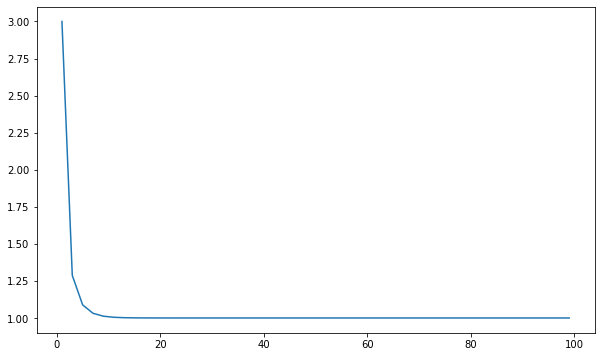

In [117]:
#evaluate E_diff

#Params
h = 1.5
J = 1
L = 100

def Energy_k(k,J,h):
    return np.sqrt( J**2 * np.sin(k)**2 + (h-J*np.cos(k))**2 )

def E0_sum(k_vec,J,h):
    return sum(Energy_k(k,J,h) for k in k_vec)
        
def deltaE(L,J,h):
    k_even = [(2*n-1)*np.pi/L for n in np.arange(1,1+L/2)]
    k_odd = [(2*n)*np.pi/L for n in np.arange(1,L/2)]
    return -2*E0_sum(k_odd,J=J,h=h)-2*J+2*E0_sum(k_even,J=J,h=h) 

print(deltaE(L=10,J=0,h=1))

Llist = np.arange(1,100+1,2)
plotlist = [deltaE(L=l,J=J,h=h) for l in Llist]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(Llist,plotlist)

In [ ]:
L=4
print([(2*n-1)*np.pi/L for n in np.arange(1,1+L/2)])
print([(2*n)*np.pi/L for n in np.arange(1,L/2)])

[0.7853981633974483, 2.356194490192345]
[1.5707963267948966]


In [112]:

def Corr_func(J,h,L):
    Corr = 0
    for k in k_even(L):
        Corr = Corr - 1/L*(J*np.sin(k)+np.cos(k)*(h-J*np.cos(k)))/Energy_k(k,J,h,0,0)
    return Corr

def Corr_vec_func(J,L,h0,h1,N):
    h_vec = np.linspace(h0,h1,N)
    Corr_vec = []
    for h in h_vec:
        Corr_vec.append(Corr_func(J,h,L))
    return h_vec,Corr_vec

plot_func = Corr_vec_func(1,10,-5,5,10000)
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(plot_func[0],plot_func[1],label='J=1,L=10')
ax.set_xlabel('h')
ax.set_ylabel('$-i < \sigma^x_r \sigma^x_{r+1} >$');
ax.set_title('Neigboring DQD spin correlation function as function of h')
ax.minorticks_on()
ax.grid('True',which='both')
plt.savefig('spinxspinsxcorr.png')


TypeError: Energy_k() takes 3 positional arguments but 5 were given

/var/folders/tx/8vpyn5_96mdb4fjlz2yv4khw0000gn/T/ipykernel_774/2391502514.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


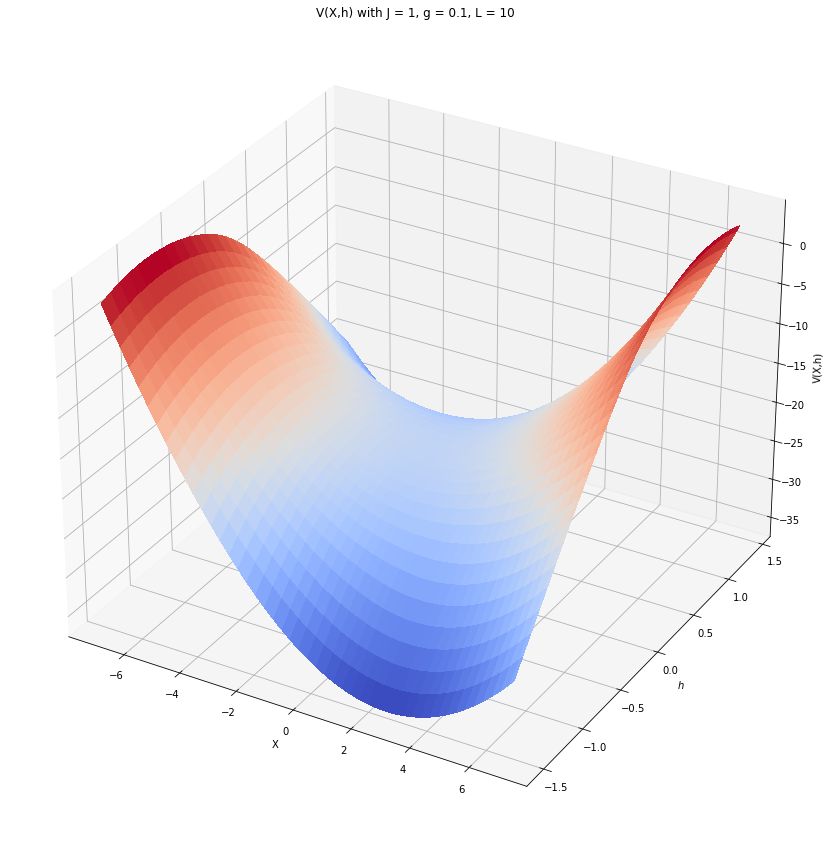

In [78]:
%matplotlib inline

def PotVY(w,J,g,L,h,x):
    kspace = [(2*n-1)*np.pi/L for n in np.arange(1-L/2,1+L/2)]
    return w/2*x**2-sum([2*np.sqrt( (J*np.sin(k))**2 + (h-np.sqrt(2)*g*x-J*np.cos(k))**2 ) for k in kspace])

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig , ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (15,15))

#params
w=1
J=1
g=0.1
L=10

# Make data.
X = np.arange(-7, 7, 0.1)
H = np.arange(-1.5, 1.5, 0.1)
X, H = np.meshgrid(X, H)
Z = PotVY(w=w,J=J,g=g,L=L,h=H,x=X)

xh = np.arange(-1.5, 1.5, 0.1)
zs = np.arange(-40, 0, 0.1)
Xh, Zs = np.meshgrid(xh, zs)
Xx = Xh*0
ax.plot_surface(Xx, Xh, Zs, alpha=0.2)

# Plot the surface.
surf = ax.plot_surface(X, H, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel("X")
ax.set_ylabel("$h$",fontsize = 10)
ax.set_zlabel("V(X,h)")
ax.set_title(f"V(X,h) with J = {J}, g = {g}, L = {L}")

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

fig.show()

fig.savefig(f"SpringPotentialJ={J}.png")

/var/folders/tx/8vpyn5_96mdb4fjlz2yv4khw0000gn/T/ipykernel_1435/378472162.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(K, Q, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False, levels=0)
/var/folders/tx/8vpyn5_96mdb4fjlz2yv4khw0000gn/T/ipykernel_1435/378472162.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


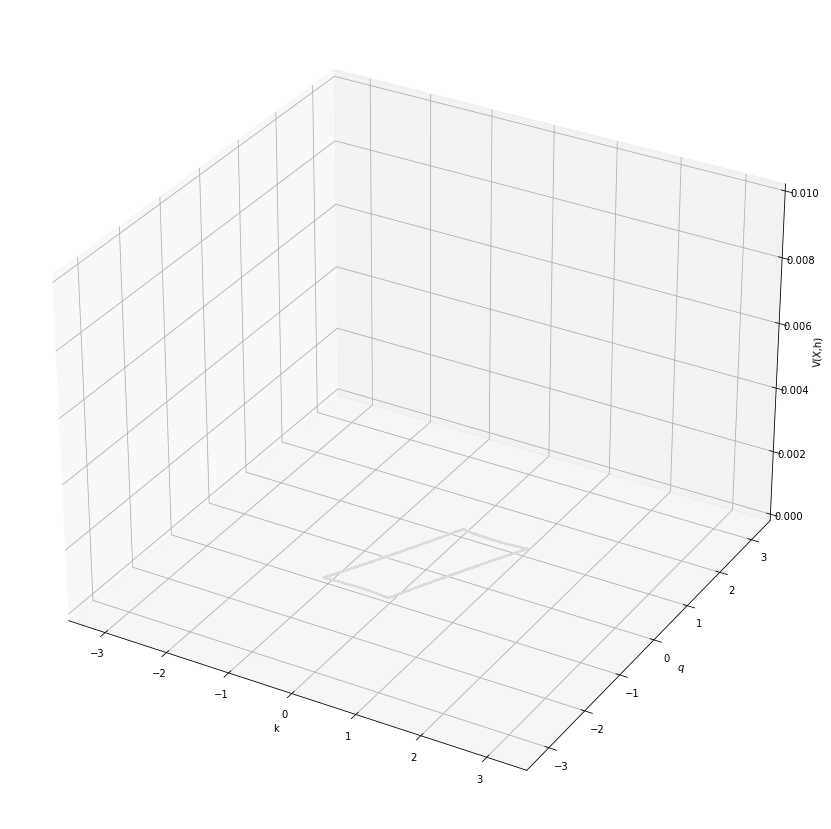

In [ ]:
%matplotlib inline

def func(k,q,h,J):
    return Energy_k(k,J=J,h=h,g=0,X=0)+Energy_k(k-q,J=J,h=h,g=0,X=0)

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig , ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (15,15))

#params
J=1
h=1

# Make data.
K = np.arange(-np.pi, np.pi, 0.001)
Q = np.arange(-np.pi, np.pi, 0.001)
K, Q = np.meshgrid(K, Q)
Z = func(K,Q,h,J)-1

# Plot the surface.
surf = ax.contour(K, Q, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False, levels=0)
ax.set_xlabel("k")
ax.set_ylabel("$q$",fontsize = 10)
ax.set_zlabel("V(X,h)")
#ax.set_title(f"V(X,h) with J = {J}, g = {g}, L = {L}")

# Customize the z axis.
ax.set_zlim(0, 0.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

fig.show()

#fig.savefig(f"SpringPotentialJ={J}.png")


NameError: name 'PotV' is not defined

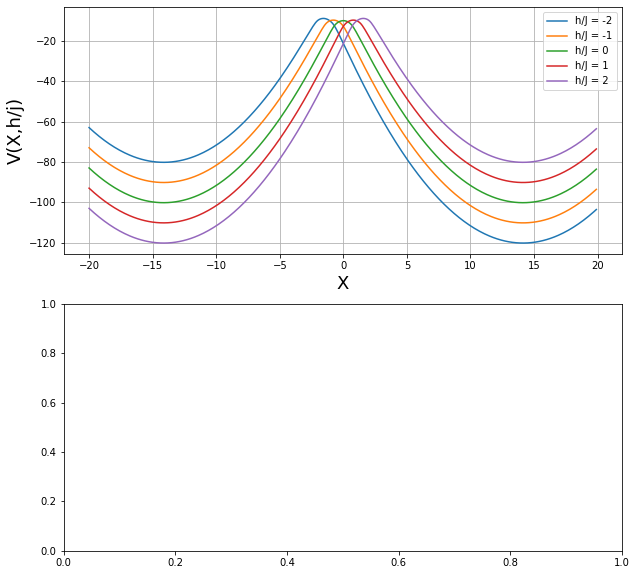

In [ ]:
X2 = np.arange(-20, 20, 0.1)
Y2 = [-2,-1,0,1,2]
G = [0.1,0.5,1,2]

fig , axs = plt.subplots(2,figsize=(10,10))

for y in Y2:
    axs[0].plot(X2,PotVY(1,1,1,10,y,X2),label="h/J = "+str(y))

axs[0].set_xlabel("X",fontsize=18)
axs[0].set_ylabel("V(X,h/j)",fontsize=18)
axs[0].legend(loc="best")
axs[0].grid("True")

for g in G:
    axs[1].plot(X2,PotV(1,1,g,10,1,X2),label="g ="+str(g))
axs[1].set_xlabel("X",fontsize=18)
axs[1].set_ylabel("V(X,h/j)",fontsize=18)
axs[1].legend(loc="best")
axs[1].grid("True")


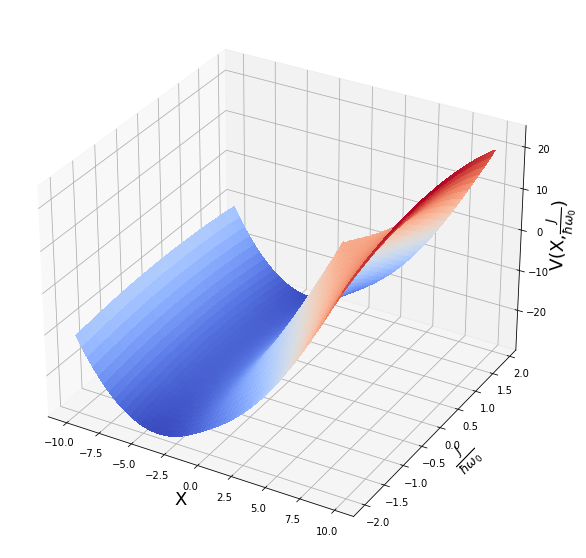

<Figure size 432x288 with 0 Axes>

In [ ]:
def k_even(L):
    k=[]
    for n in range(1,int(L/2)+1):
        kn = (2*n-1)*np.pi/L
        k.append(kn)
    return k

def PotV(w,h,g,L,J,x):
    kspace = k_even(L)
    sum = 0
    for k in kspace:
        sum = sum + np.sqrt( J**2*np.sin(k)**2 + (h-np.sqrt(2)*g*x-J*np.cos(k))**2 )
    return w/2*x**2-2*sum


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (10,10))

# Make data.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = PotV(1,1.7,0.3,10,Y,X)

#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("$\\frac{J}{\hbar \omega_0}$", fontsize=18)
ax.set_zlabel("V(X,$\\frac{J}{\hbar \omega_0}$)", fontsize=18)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

plt.savefig('Spring_Potential_realistic.png')

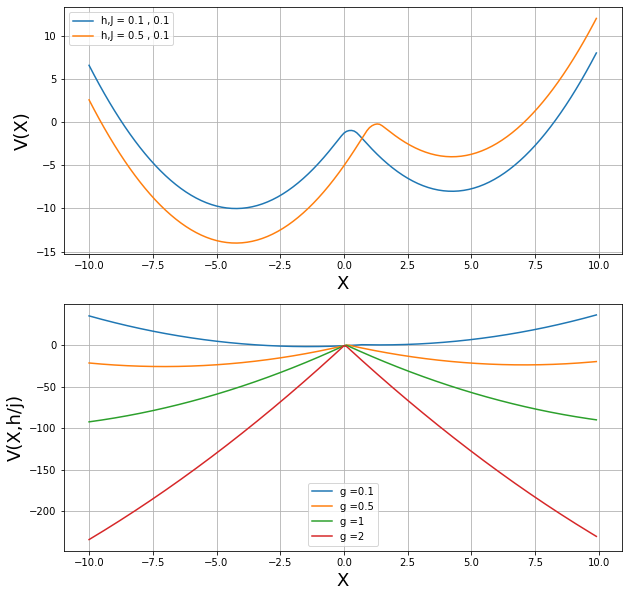

In [ ]:
X2 = np.arange(-10, 10, 0.1)
Y2 = [-2,-1,0,1,2]
G = [0.1,0.5,1,2]

fig , axs = plt.subplots(2,figsize=(10,10))


axs[0].plot(X2,PotV(1,0.1,0.3,10,0.1,X2),label="h,J = 0.1 , 0.1")
axs[0].plot(X2,PotV(1,0.5,0.3,10,0.1,X2),label="h,J = 0.5 , 0.1")

axs[0].set_xlabel("X",fontsize=18)
axs[0].set_ylabel("V(X)",fontsize=18)
axs[0].legend(loc="best")
axs[0].grid("True")

for g in G:
    axs[1].plot(X2,PotV(1,0.1,g,10,0.0001,X2),label="g ="+str(g))
axs[1].set_xlabel("X",fontsize=18)
axs[1].set_ylabel("V(X,h/j)",fontsize=18)
axs[1].legend(loc="best")
axs[1].grid("True")

## Plotting the saddle point equation

In [3]:
def LHS(ø):
    return ø

In [4]:
#Define RHS

#First define q-space

L = 10
q_space = 2*np.pi/L*np.array( [int(x) for x in (np.arange(-L/2,L/2)+1)] )

def xi(q,h,J,T,L,g,ø):
    en = np.sqrt( ( 2*h-g/np.sqrt(L/T)*ø-2*J*np.cos(q) )**2 + (2*J*np.sin(q))**2 )
    return en

def RHS(h,J,T,L,g,w,ø):
    q_space = 2*np.pi/L*np.array( [int(x) for x in (np.arange(-L/2,L/2)+1)] )
    sum = 0
    for q in q_space:
        xiq = xi(q,h,J,T,L,g,ø)
        sum += (2*h-2*J*np.cos(q)-g/(np.sqrt(L/T))*ø)/xiq*np.tanh( xiq / (2*T) )
    return -g/w*1/np.sqrt(T*L)*sum - g/(2*w)*np.sqrt(L/T)

-0.5683098861837907


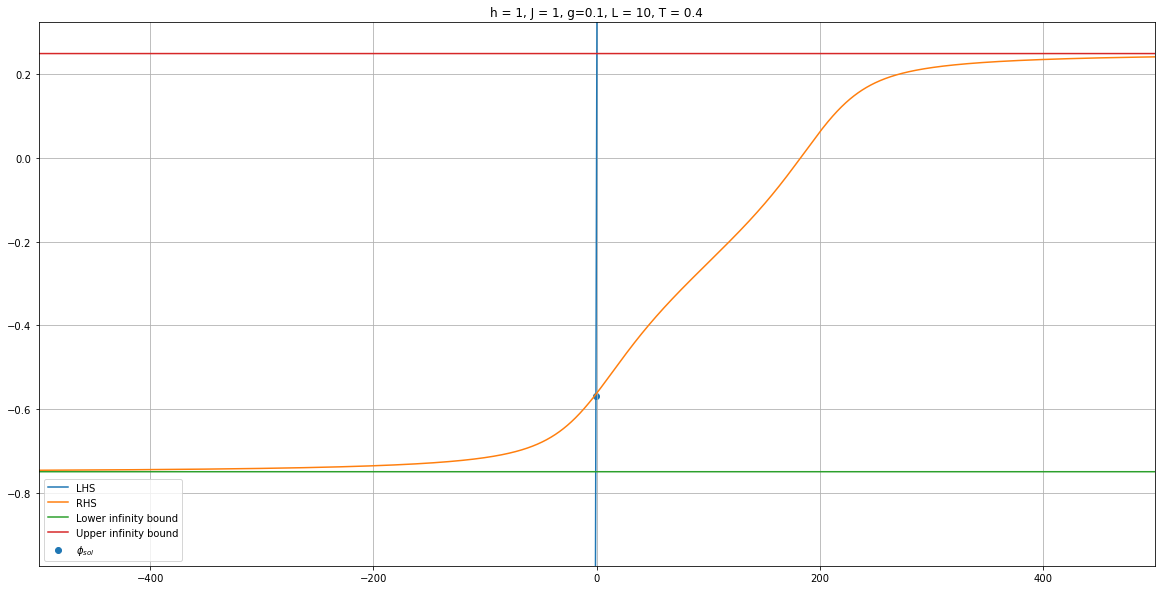

In [11]:
N = 5000
phi_space = np.linspace(-900,900,N)

w = 1
g = 0.1
h = 1
J = 1
L = 10
T = 0.4

RHS_list = []
for ø in phi_space:
    RHS_list.append(RHS(h,J,T,L,g,w,ø))

øsol = g*(-2/np.pi-1/2)*np.sqrt(L/T)
print(øsol)

lb = -3/2*g*np.sqrt(L/T)
ub = 1/2*g*np.sqrt(L/T)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(phi_space,phi_space, label="LHS")
ax.plot(phi_space, RHS_list, label="RHS")
ax.plot(phi_space,np.full(N,lb), label="Lower infinity bound")
ax.plot(phi_space,np.full(N,ub),label="Upper infinity bound")
ax.scatter(øsol,øsol, label="$\phi_{sol}$")
ax.set_ylim(lb*1.3,ub*1.3)
ax.set_xlim(-500,500)
ax.grid()
ax.legend()
ax.set_title(f"h = {h}, J = {J}, g={g}, L = {L}, T = {T}")
fig.savefig("saddle_point_eq_unity.png")